
# Project: Investigate a Dataset (noshowappointments-kagglev2-may-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling



In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#we are gonna see data frama data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#we are gonna see number of columns and rows 
df.shape

(110527, 14)

In [6]:
#we will see number of null value in each columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
for x in df.columns:
    if df[x].isnull().sum() == 0:
        continue 
    else:
        print("this columns {} has null value and the number of it is {}".format(x,df[x].isnull.sum()))

so no null values in the dataset 

In [8]:
#we are gonna search for duplicated rows 
df.duplicated().sum()

0

no duplicated data also 

In [9]:
#we will see number of unique data in the result 
df["No-show"].unique()


array(['No', 'Yes'], dtype=object)

In [10]:
#we are gona change the name of this columns and it's value to deal with it easy
df.rename(columns={'No-show':'is_show'},inplace=True)


In [11]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'is_show'],
      dtype='object')

In [12]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,is_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#now we  will change yes to no and no to yes 
df['is_show']=df['is_show'].replace({"No":'yes',"Yes":'no'})

In [14]:
df["is_show"].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,is_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,yes


In [16]:
#we will se number of duplicated patient id 
df['PatientId'].duplicated().sum()

48228

In [17]:
#unique value in patient id 
df["PatientId"].nunique()

62299

In [18]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


note:the min age is -1 an that is in correct age we will drop this data

In [19]:
df.duplicated(["PatientId","AppointmentID"]).sum()

0

# some data  cleaning 

In [20]:
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,is_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,yes


In [21]:
df.drop(index=99832,inplace=True)

In [22]:
df[df['Age']==0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,is_show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,yes
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,yes
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,yes
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,yes
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,yes
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,yes
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,yes
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,yes


In [23]:
df.rename(columns={"Hipertension":'Hypertension'},inplace=True)

#we will convert the schedule time and appointment time to time date time 

In [24]:
#first we will convert columns name to lower case 
df.columns=[x.lower() for x in df.columns]

In [25]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'is_show'],
      dtype='object')

In [26]:
df["scheduledday"]=pd.to_datetime(df['scheduledday']).dt.date.astype('datetime64[ns]')
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date.astype('datetime64[ns]')

In [27]:
df['waiting_days'] = (df.appointmentday - df.scheduledday).dt.days

In [28]:
df['waiting_days'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [29]:
df.duplicated(['patientid','waiting_days','is_show']).sum()

15975

In [30]:
#we will remove duplicates which is same patient with same time of apperance and the same show status 

In [31]:
df.drop_duplicates(['patientid','waiting_days','is_show'],inplace = True)

we will made the day of the week columns 

In [32]:
df['day_of_week']=df["scheduledday"].dt.day_name()

In [33]:
df['appointment_day']=df["appointmentday"].dt.day_name()

In [34]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,is_show,waiting_days,day_of_week,appointment_day
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,0,Friday,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,0,Friday,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,yes,0,Friday,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,0,Friday,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,0,Friday,Friday


we will drop unimportant columns 

In [35]:
df.drop(["patientid",'appointmentid','scheduledday',"appointmentday"],axis=1,inplace=True)

In [36]:
 df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,is_show,waiting_days,day_of_week,appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,0,Friday,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,0,Friday,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,0,Friday,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,0,Friday,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,0,Friday,Friday


<a id='eda'></a>
## Exploratory Data Analysis

now we will invistigate some data 



# general visualiazion 

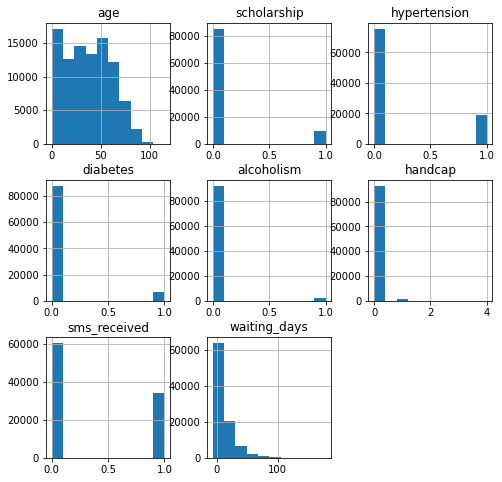

In [37]:
df.hist(figsize=(8,8));

In [38]:
attended_patient=df.is_show == 'yes'
absent_patient=df.is_show == 'no'

In [39]:
df[attended_patient].count(),df[absent_patient].count()

(gender             73817
 age                73817
 neighbourhood      73817
 scholarship        73817
 hypertension       73817
 diabetes           73817
 alcoholism         73817
 handcap            73817
 sms_received       73817
 is_show            73817
 waiting_days       73817
 day_of_week        73817
 appointment_day    73817
 dtype: int64,
 gender             20734
 age                20734
 neighbourhood      20734
 scholarship        20734
 hypertension       20734
 diabetes           20734
 alcoholism         20734
 handcap            20734
 sms_received       20734
 is_show            20734
 waiting_days       20734
 day_of_week        20734
 appointment_day    20734
 dtype: int64)

<AxesSubplot:>

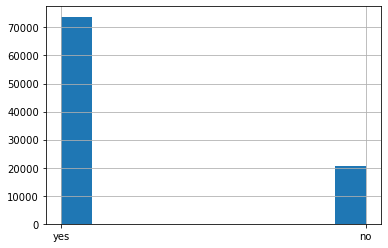

In [40]:
df['is_show'].hist()

In [41]:
df[attended_patient].mean(),df[absent_patient].mean()

(age             37.790834
 scholarship      0.092255
 hypertension     0.207798
 diabetes         0.075078
 alcoholism       0.024222
 handcap          0.021242
 sms_received     0.330412
 waiting_days     9.843884
 dtype: float64,
 age             34.552040
 scholarship      0.113871
 hypertension     0.171602
 diabetes         0.065255
 alcoholism       0.030481
 handcap          0.018713
 sms_received     0.459342
 waiting_days    16.093470
 dtype: float64)

# Research Question 1 (does age affect the attendance)

Text(0.5, 1.0, 'effect of age on attendance')

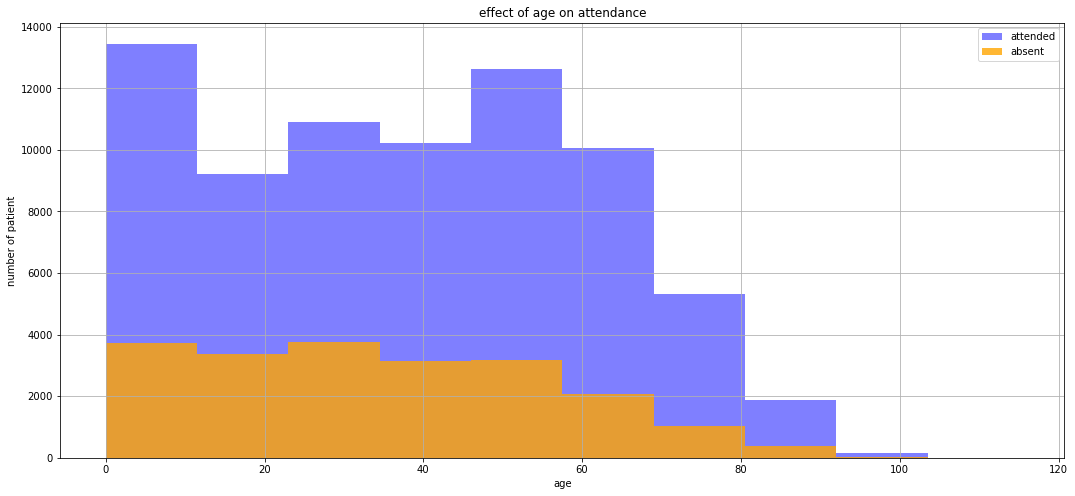

In [42]:
plt.figure(figsize=(18,8))


df['age'][attended_patient].hist(alpha=.5,color='b',label='attended')
df['age'][absent_patient].hist(alpha=.8,color='orange',label='absent')
plt.legend();
plt.ylabel('number of patient')
plt.xlabel('age')
plt.title('effect of age on attendance')

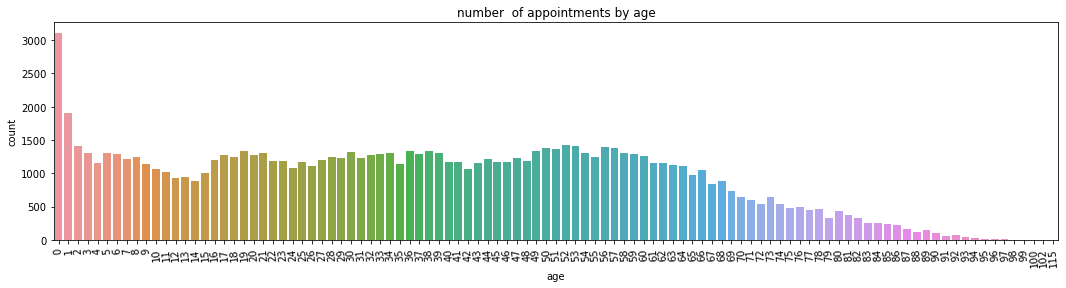

In [43]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=95)
ax = sns.countplot(x=df.age)
ax.set_title("number  of appointments by age")
plt.show()

observation:attendance increase when age increase put absent increase also when age increase

In [44]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,is_show,waiting_days,day_of_week,appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,0,Friday,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,0,Friday,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,0,Friday,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,0,Friday,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,0,Friday,Friday


### Research Question 2  (what is gender effect on attendace ?)

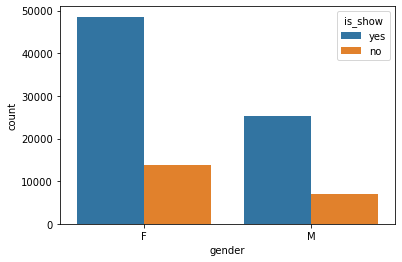

In [45]:
ax = sns.countplot(x=df.gender, hue=df.is_show, data=df)

In [46]:
#we will see the percenage of  attendace of each gender
df_m=df[df["gender"]=='M']
df_m_show=df[(df['gender'] =="M")&(df['is_show']=="yes")]
df_f=df[df['gender']=='F']
df_f_show=df[(df['gender']=="F")&(df['is_show']=='yes')]

attendance_ratio_m=len(df_m_show)/len(df_m)
attendance_ratio_f=len(df_f_show)/len(df_f)
print(attendance_ratio_m)
print(attendance_ratio_f)

0.7830563135698337
0.779496974463509


the number of attended female is much more than male and the absent also.but the fraction of attendaance is almost same

# Question number 3 (what factors affect attendance ?)

In [47]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,is_show,waiting_days,day_of_week,appointment_day
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,yes,0,Friday,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,yes,0,Friday,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,yes,0,Friday,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes,0,Friday,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,yes,0,Friday,Friday


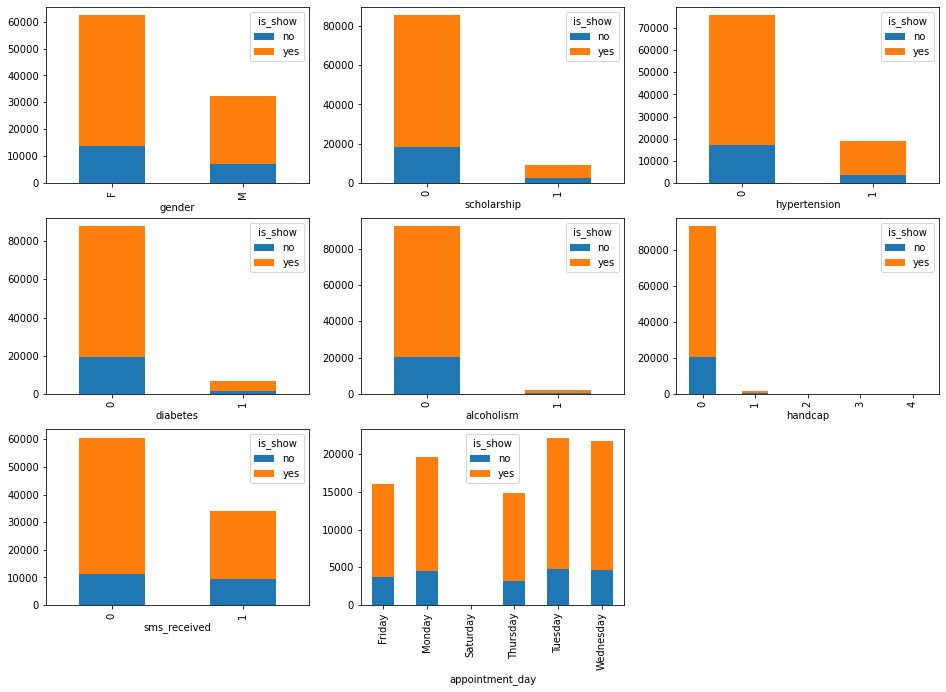

In [50]:
factors = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'appointment_day']

fig = plt.figure(figsize=(16, 11))
for y, factor in enumerate(factors):
    ax = fig.add_subplot(3, 3,y+1)
    df.groupby([factor, 'is_show'])[factor].count().unstack('is_show').plot(ax=ax, kind='bar', stacked=True)


there is no factors appears as most effective one 

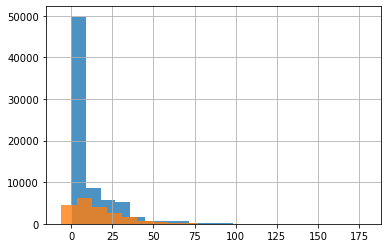

In [58]:
df['waiting_days'][attended_patient].hist(alpha=0.8, bins=20);
df['waiting_days'][absent_patient].hist(alpha=0.8, bins=20);

the shorten waiting period the more possibality of appearing

# question number 4 (the effect of neighbourhood on attendance?)

Text(0.5, 1.0, 'effect of neighbourhood  on attendance')

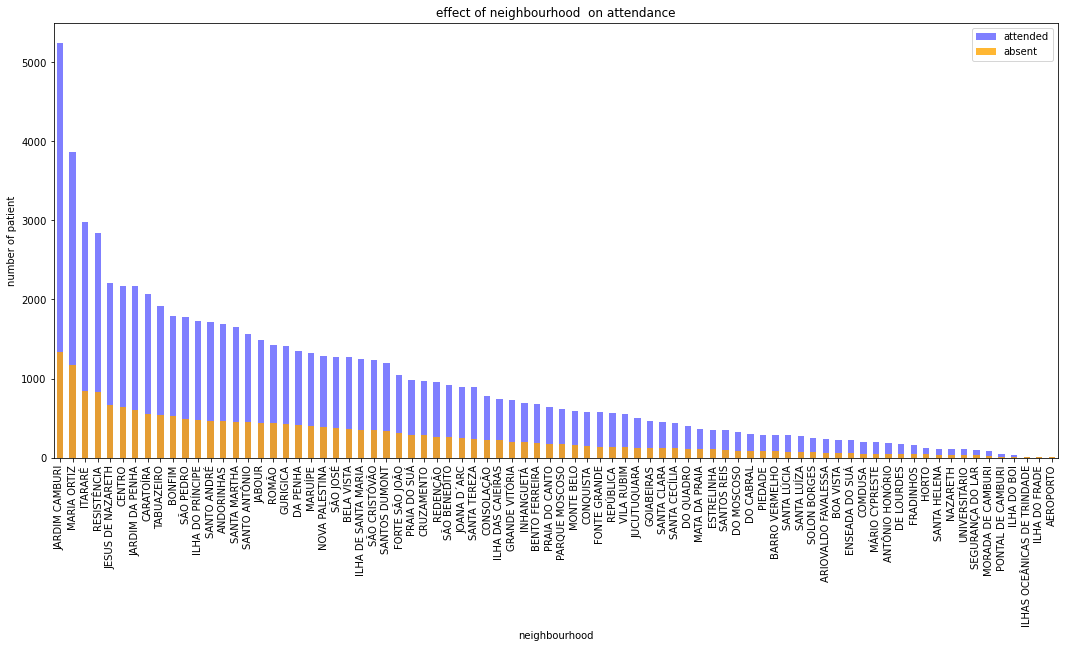

In [63]:
plt.figure(figsize=(18,8))


df['neighbourhood'][attended_patient].value_counts().plot(kind='bar',alpha=.5,color='b',label='attended')
df['neighbourhood'][absent_patient].value_counts().plot(kind='bar',alpha=.8,color='orange',label='absent')
plt.legend();
plt.ylabel('number of patient')
plt.xlabel('neighbourhood')
plt.title('effect of neighbourhood  on attendance')

In [ ]:
neighbourhood has great effect on attendance number but appear to does not affect attendance absent rate

<a id='conclusions'></a>
## Conclusions

after the investgation of the dataset we have some point to share:
neighbourhood has great effect on attendance number but appear to does not affect attendance absent rate.
the shorten waiting period the more possibality of appearing.
the number of attended female is much more than male and the absent also.but the fraction of attendaance is almost same.
sundayand saturday are appear to be off day and the rate of attendance is too low. most people attend on tuesday , wednesday.
the number of attended female is much more than male and the absent also.but the fraction of attendaance is almost same.
attendance increase when age increase put absent increase also when age increase

